In [30]:
import numpy as np
from sklearn.manifold import TSNE, LocallyLinearEmbedding, MDS
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import fetch_openml
from sklearn.manifold import Isomap
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import random

In [31]:
mnist_images = fetch_openml('mnist_784', as_frame=False)
X_train, y_train = mnist_images.data[:60_000], mnist_images.target[:60_000]
X_test, y_test = mnist_images.data[60_000:], mnist_images.target[60_000:]
model = RandomForestClassifier(random_state=60)

In [32]:
n_samples = 3_000
X_subset = X_train[:n_samples]
y_subset = y_train[:n_samples]


In [33]:
def plot_reduced_data(X_reduced, y, title, use_labels=False):
    plt.figure(figsize=(10, 8))
    if X_reduced.shape[0] > 1000:
        idx = np.random.choice(X_reduced.shape[0], size=1000, replace=False)
        X_reduced = X_reduced[idx]
        y = y[idx]
    if use_labels:
        for i, (x, label) in enumerate(zip(X_reduced, y)):
            plt.text(x[0], x[1], str(label), color=plt.cm.tab10(int(label)), fontdict={'size': 8})
    else:
        scatter = plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y.astype(int), cmap="tab10", s=10, alpha=0.7)
        plt.colorbar(scatter, ticks=range(10))
    plt.title(title)
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.show()

def print_metrics(name, y_true, y_pred):
    print(f"{name} - RandomForest Performance")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred, average="macro"))
    print("Recall:", recall_score(y_true, y_pred, average="macro"))
    print("F1 Score:", f1_score(y_true, y_pred, average="macro"))
    print()

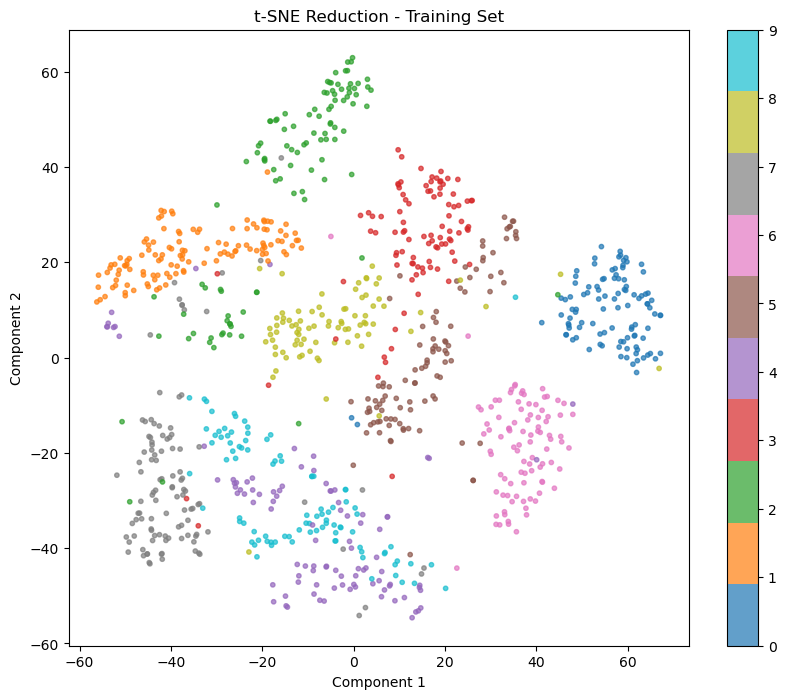

In [34]:
tsne = TSNE(n_components=2, random_state=60)
X_train_tsne = tsne.fit_transform(X_subset)

plot_reduced_data(X_train_tsne, y_subset, "t-SNE Reduction - Training Set", use_labels=False)


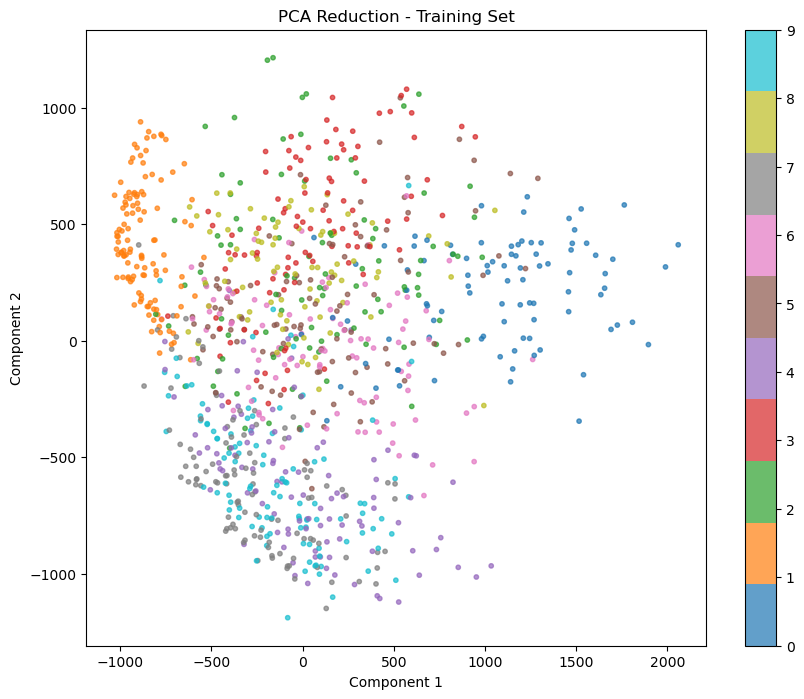

PCA - RandomForest Performance
Accuracy: 0.4177
Precision: 0.40427448532977256
Recall: 0.4088879779029167
F1 Score: 0.4048831352821221



In [35]:
pipeline_pca = Pipeline([
    ('reducer', PCA(n_components=2)),
    ('classifier', model)
])

pipeline_pca.fit(X_subset, y_subset)  
y_pred_pca = pipeline_pca.predict(X_test)

plot_reduced_data(
    pipeline_pca.named_steps['reducer'].transform(X_subset), 
    y_subset, 
    "PCA Reduction - Training Set", 
    use_labels=False
)
print_metrics("PCA", y_test, y_pred_pca)


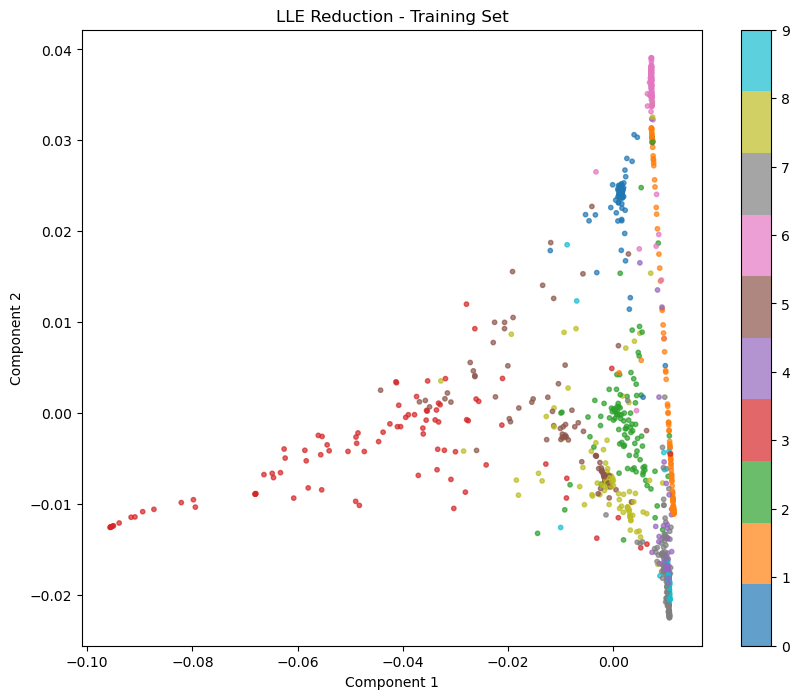

LLE - RandomForest Performance
Accuracy: 0.7629
Precision: 0.7622745530940919
Recall: 0.7595590141024469
F1 Score: 0.7587220900237824



In [36]:
pipeline_lle = Pipeline([
    ('reducer', LocallyLinearEmbedding(n_components=2, random_state=60)),
    ('classifier', model)
])

pipeline_lle.fit(X_subset, y_subset)  
y_pred_lle = pipeline_lle.predict(X_test)

plot_reduced_data(
    pipeline_lle.named_steps['reducer'].transform(X_subset), 
    y_subset, 
    "LLE Reduction - Training Set", 
    use_labels=False
)
print_metrics("LLE", y_test, y_pred_lle)

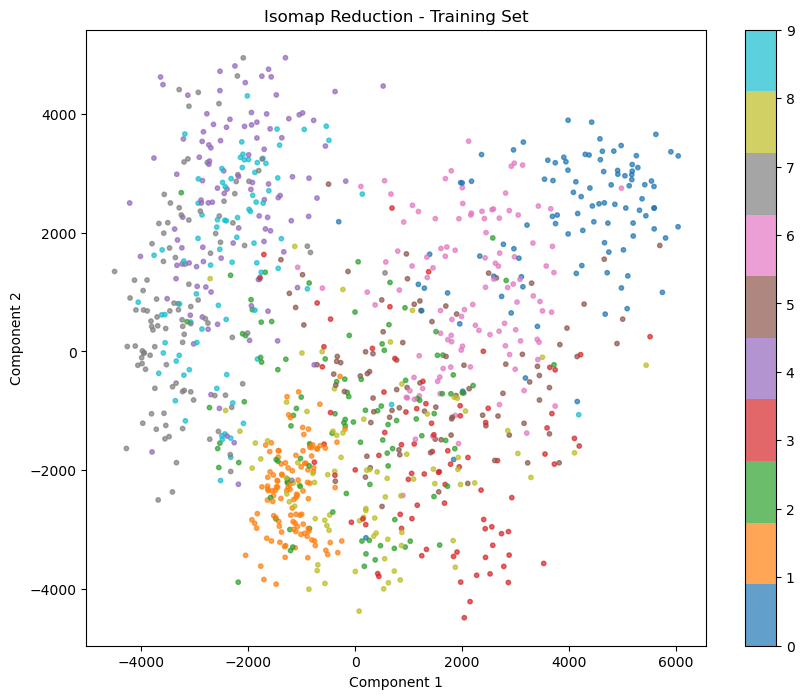

Isomap - RandomForest Performance
Accuracy: 0.5174
Precision: 0.49327879633827043
Recall: 0.5104745871670229
F1 Score: 0.49740206781844654



In [37]:
pipeline_isomap = Pipeline([
    ('reducer', Isomap(n_neighbors=10, n_components=2)),
    ('classifier', model)
])

pipeline_isomap.fit(X_subset, y_subset)  
y_pred_isomap = pipeline_isomap.predict(X_test)

plot_reduced_data(
    pipeline_isomap.named_steps['reducer'].transform(X_subset), 
    y_subset, 
    "Isomap Reduction - Training Set", 
    use_labels=False
)
print_metrics("Isomap", y_test, y_pred_isomap)

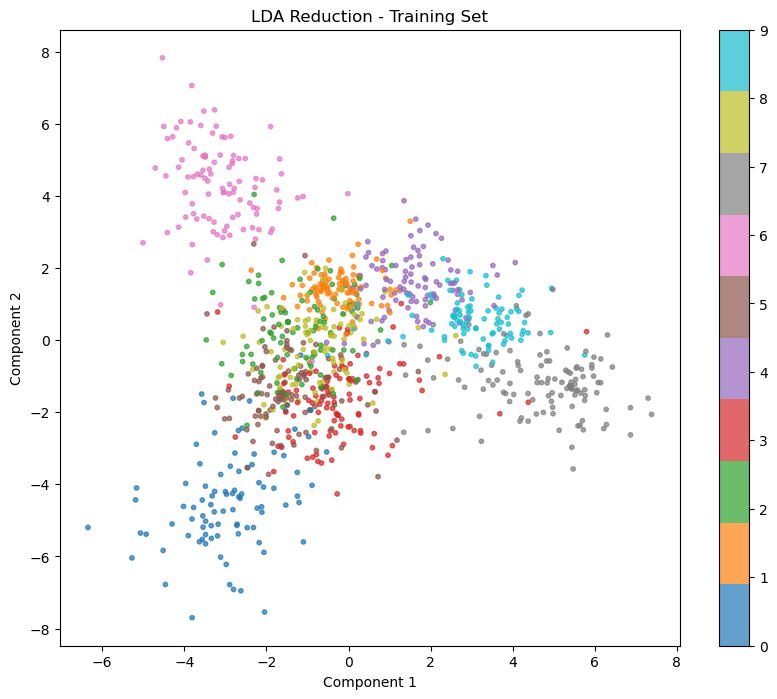

LDA - RandomForest Performance
Accuracy: 0.54
Precision: 0.5237541325925804
Recall: 0.5359402000348661
F1 Score: 0.5272502951825322



In [38]:
pipeline_lda = Pipeline([
    ('reducer', LinearDiscriminantAnalysis(n_components=2)),
    ('classifier', model)
])

pipeline_lda.fit(X_subset, y_subset)  
y_pred_lda = pipeline_lda.predict(X_test)

plot_reduced_data(
    pipeline_lda.named_steps['reducer'].transform(X_subset), 
    y_subset, 
    "LDA Reduction - Training Set", 
    use_labels=False
)
print_metrics("LDA", y_test, y_pred_lda)